In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/smartphone-retail-outlet-sales-data/SMARTPHONE RETAIL OUTLET SALE DATA.csv


In [2]:
df = pd.read_csv("/kaggle/input/smartphone-retail-outlet-sales-data/SMARTPHONE RETAIL OUTLET SALE DATA.csv")

## Data Overview & Cleaning

In [3]:
df.head()

,Date,F.Y,QUARTER,P_NO,PAYMENT TYPE,TYPE OF PRODUCT,Quantity,Price,Amount,TYPE OF ACCESSORY/MOBILE
0,01-04-2018,2018-2019,1,P/A/36,CASH,ACCESSORY,1,2042.38,2542.38,COVER
1,01-04-2018,2018-2019,1,P/A/47,CASH,ACCESSORY,1,2042.38,2118.64,WIRELESS HEADSET
2,01-04-2018,2018-2019,1,P/M/A34,CREDIT,MOBILE,1,2042.38,13303.58,BUDGET PHONE
3,01-04-2018,2018-2019,1,P/M/A42,CREDIT,MOBILE,1,2042.38,51696.43,FLAGSHIP PHONE
4,01-04-2018,2018-2019,1,P/M/A42,DEBIT,MOBILE,1,2042.38,51696.42,FLAGSHIP PHONE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6421 entries, 0 to 6420
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      6421 non-null   object 
 1   F.Y                       6421 non-null   object 
 2   QUARTER                   6421 non-null   int64  
 3   P_NO                      6420 non-null   object 
 4   PAYMENT TYPE              6421 non-null   object 
 5   TYPE OF PRODUCT           6421 non-null   object 
 6   Quantity                  6421 non-null   int64  
 7   Price                     6421 non-null   float64
 8   Amount                    6421 non-null   float64
 9   TYPE OF ACCESSORY/MOBILE  6421 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 501.8+ KB


In [5]:
df.describe()

,QUARTER,Quantity,Price,Amount
count,6421.000000,6421.000000,6421.000000,6421.000000
mean,2.249338,1.058246,18295.175739,19255.968355
std,1.000452,0.949686,19855.194755,20608.895584
min,1.000000,1.000000,410.710000,915.260000
25%,1.000000,1.000000,5026.780000,5892.860000
50%,2.000000,1.000000,13776.780000,14284.820000
75%,3.000000,1.000000,20919.640000,21419.640000
max,4.000000,30.000000,104767.860000,230803.570000


In [6]:
df.isna().sum()

Date                        0
F.Y                         0
QUARTER                     0
P_NO                        1
PAYMENT TYPE                0
TYPE OF PRODUCT             0
Quantity                    0
Price                       0
Amount                      0
TYPE OF ACCESSORY/MOBILE    0
dtype: int64

### Deleting missing values (Since no of missing values are very less)

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

Date                        0
F.Y                         0
QUARTER                     0
P_NO                        0
PAYMENT TYPE                0
TYPE OF PRODUCT             0
Quantity                    0
Price                       0
Amount                      0
TYPE OF ACCESSORY/MOBILE    0
dtype: int64

In [9]:
df['PAYMENT TYPE'].value_counts()

PAYMENT TYPE
MOBILE PAYMENTS    1831
DEBIT              1787
CREDIT             1630
CASH               1172
Name: count, dtype: int64

In [10]:
df['TYPE OF PRODUCT'].value_counts()

TYPE OF PRODUCT
MOBILE       4985
ACCESSORY    1292
TABLET        143
Name: count, dtype: int64

## Univariate Analysis

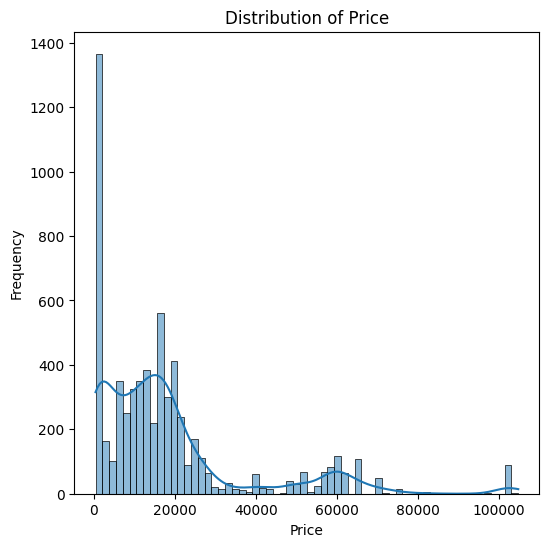

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 6))
sns.histplot(df['Price'], kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

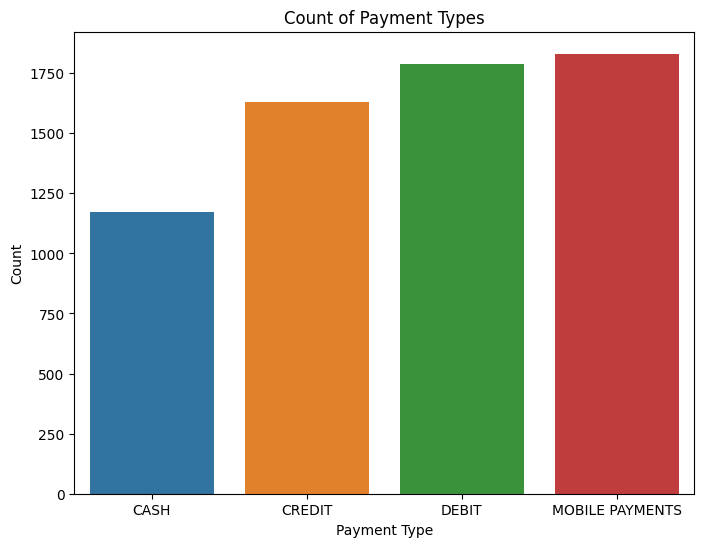

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PAYMENT TYPE', data=df)
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title('Count of Payment Types')
plt.show()

## Bivariate Analysis

### Correlation between numerical variables 

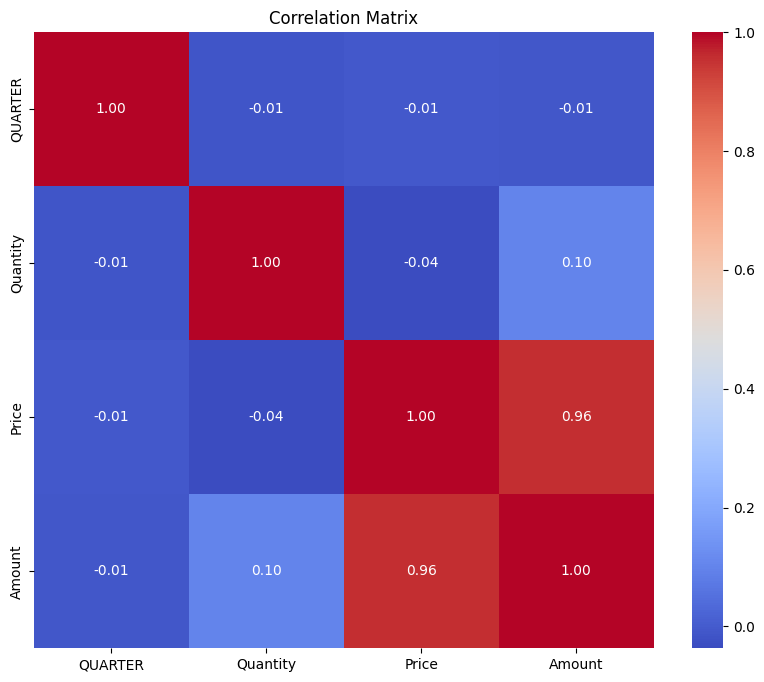

In [13]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Comparative analysis between numerical and categorical variables:

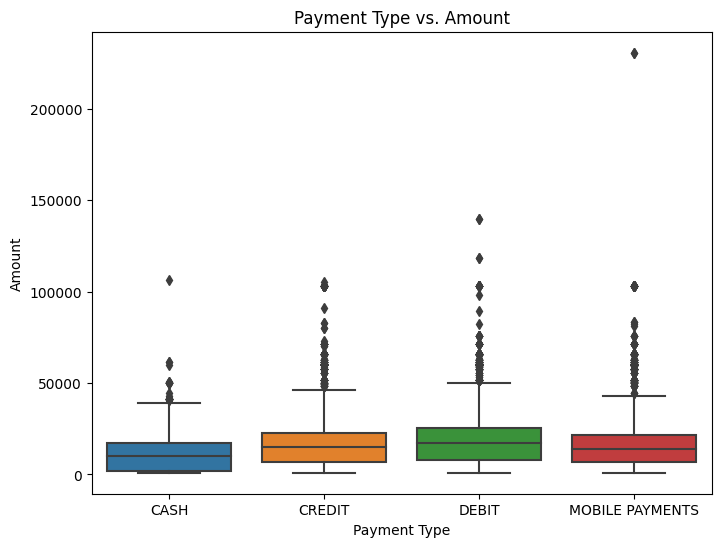

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='PAYMENT TYPE', y='Amount', data=df)
plt.xlabel('Payment Type')
plt.ylabel('Amount')
plt.title('Payment Type vs. Amount')
plt.show()

## Multivariate Analysis

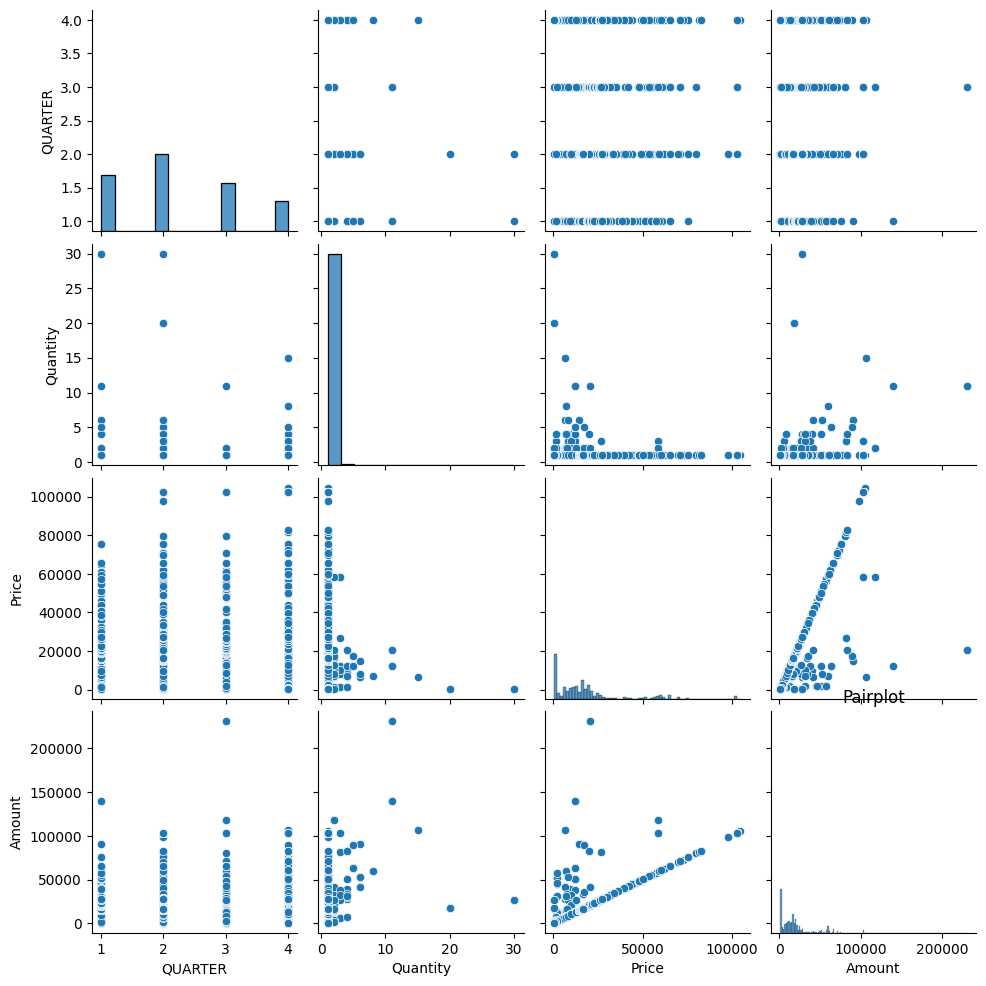

In [15]:
sns.pairplot(df)
plt.title('Pairplot')
plt.show()

## Outlier Detection and Treatment

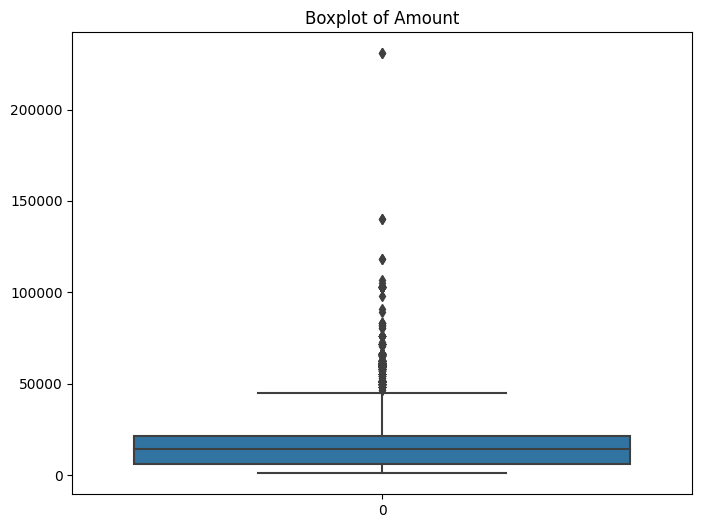

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(df['Amount'])
plt.title('Boxplot of Amount')
plt.show()

## Time-Series Analysis

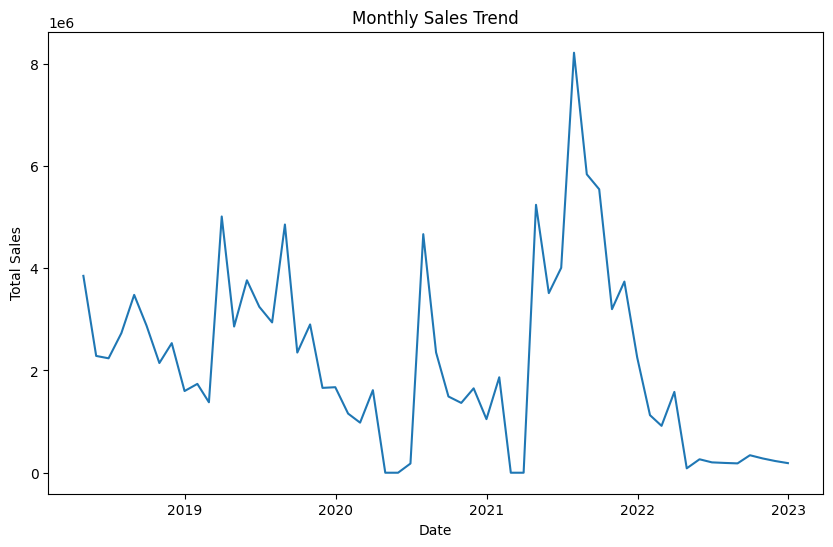

In [17]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace=True)
monthly_sales = df.resample('M').sum()
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Amount'])
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.show()